In [39]:
# import numpy as np
from scipy.spatial.distance import pdist, squareform
from scipy import exp
from scipy.linalg import eigh
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.decomposition import PCA,FastICA
np.random.seed(0)

In [55]:
# define the function
def stepwise_kpca(X, gamma, n_components):
    """
    Implementation of a RBF kernel PCA.

    Arguments:
        X: A MxN dataset as NumPy array where the samples are stored as rows (M),
           and the attributes defined as columns (N).
        gamma: A free parameter (coefficient) for the RBF kernel.
        n_components: The number of components to be returned.

    """
    # Calculating the squared Euclidean distances for every pair of points
    # in the MxN dimensional dataset.
    sq_dists = pdist(X, 'sqeuclidean')

    # Converting the pairwise distances into a symmetric MxM matrix.
    mat_sq_dists = squareform(sq_dists)

    # Computing the MxM kernel matrix.
    K = exp(-gamma * mat_sq_dists)

    # Centering the symmetric NxN kernel matrix.
    N = K.shape[0]
    one_n = np.ones((N,N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)

    # Obtaining eigenvalues in descending order with corresponding
    # eigenvectors from the symmetric matrix.
    eigvals, eigvecs = eigh(K)

    # Obtaining the i eigenvectors that corresponds to the i highest eigenvalues.
    X_pc = np.column_stack((eigvecs[:,-i] for i in range(1,n_components+1)))

    return X_pc,mat_sq_dists,exp(-gamma * mat_sq_dists),K

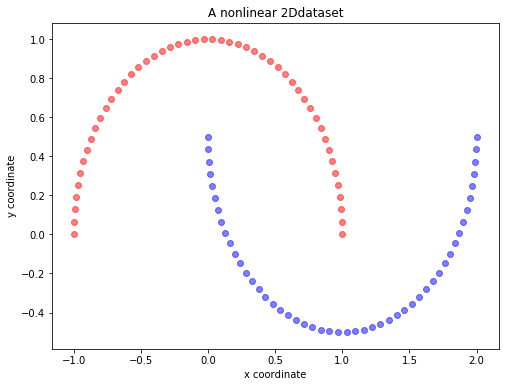

In [56]:
# Create the data and show
X, y = make_moons(n_samples=100, random_state=123)

plt.figure(figsize=(8,6))

plt.scatter(X[y==0, 0], X[y==0, 1], color='red', alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', alpha=0.5)

plt.title('A nonlinear 2Ddataset')
plt.ylabel('y coordinate')
plt.xlabel('x coordinate')

plt.show()

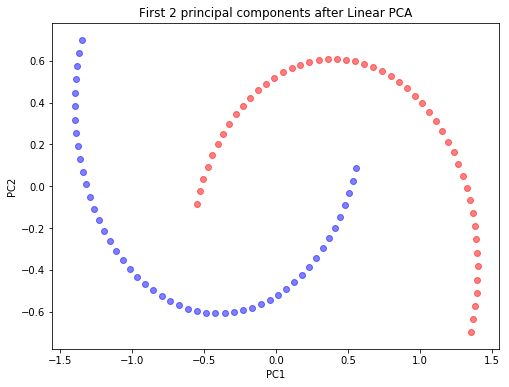

In [57]:
# PCA into 2 Dimesnion
scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_spca[y==0, 0], X_spca[y==0, 1], color='red', alpha=0.5)
plt.scatter(X_spca[y==1, 0], X_spca[y==1, 1], color='blue', alpha=0.5)

plt.title('First 2 principal components after Linear PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

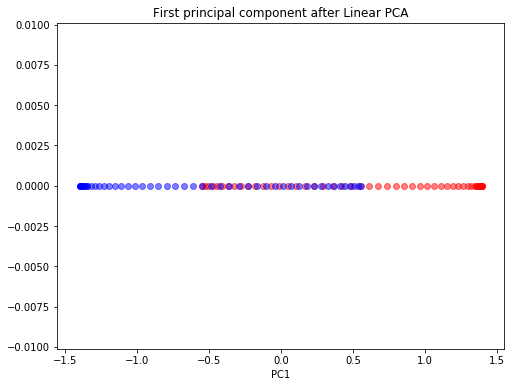

In [58]:
# Reduction to one
scikit_pca = PCA(n_components=1)
X_spca = scikit_pca.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_spca[y==0, 0], np.zeros((50,1)), color='red', alpha=0.5)
plt.scatter(X_spca[y==1, 0], np.zeros((50,1)), color='blue', alpha=0.5)

plt.title('First principal component after Linear PCA')
plt.xlabel('PC1')

plt.show()

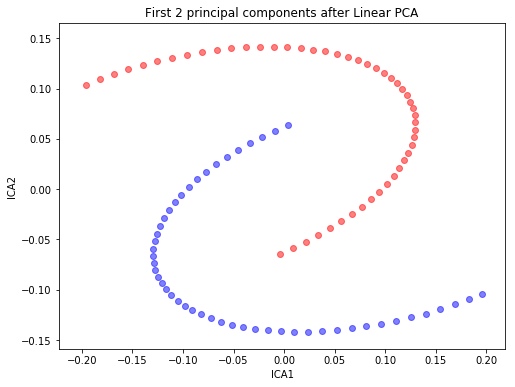

In [59]:
# 2 Component to ICA
scikit_pca = FastICA(n_components=2)
X_spca = scikit_pca.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_spca[y==0, 0], X_spca[y==0, 1], color='red', alpha=0.5)
plt.scatter(X_spca[y==1, 0], X_spca[y==1, 1], color='blue', alpha=0.5)

plt.title('First 2 principal components after Linear PCA')
plt.xlabel('ICA1')
plt.ylabel('ICA2')
plt.show()

(100, 1)


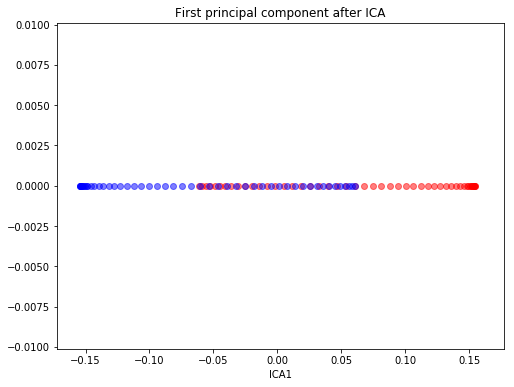

In [60]:
# Reduction to ICA
scikit_ica = FastICA(n_components=1)
X_spca = scikit_ica.fit_transform(X)

print(X_spca.shape)
plt.figure(figsize=(8,6))
plt.scatter(X_spca[y==0, 0], np.zeros((50,1)), color='red', alpha=0.5)
plt.scatter(X_spca[y==1, 0], np.zeros((50,1)), color='blue', alpha=0.5)

plt.title('First principal component after ICA')
plt.xlabel('ICA1')

plt.show()

In [68]:
# show 2 step wise pca
X_pc,two,three,four = stepwise_kpca(X, gamma=15, n_components=2)


print(three.mean())
print(three.sum())
print(four.mean())
print(four.sum())
# plt.figure(figsize=(8,6))
# plt.scatter(X_pc[y==0, 0], X_pc[y==0, 1], color='red', alpha=0.5)
# plt.scatter(X_pc[y==1, 0], X_pc[y==1, 1], color='blue', alpha=0.5)

# plt.title('First 2 principal components after RBF Kernel PCA')
# plt.text(-0.18, 0.18, 'gamma = 15', fontsize=12)
# plt.xlabel('PC1')
# plt.ylabel('PC2')
# plt.show()

0.06858729741396948
685.8729741396947
8.659739592076221e-18
8.659739592076221e-14


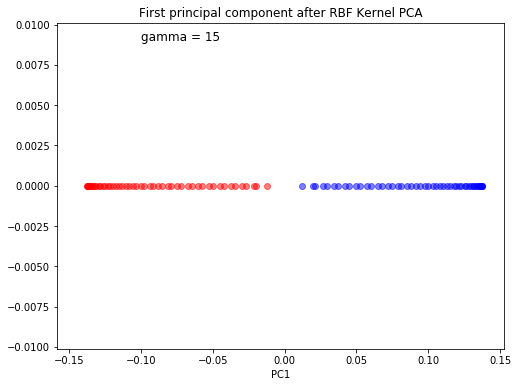

In [9]:
# show the 1 component 
plt.figure(figsize=(8,6))
plt.scatter(X_pc[y==0, 0], np.zeros((50)), color='red', alpha=0.5)
plt.scatter(X_pc[y==1, 0], np.zeros((50)), color='blue', alpha=0.5)

plt.title('First principal component after RBF Kernel PCA')
plt.text(-0.1, 0.009, 'gamma = 15', fontsize=12)
plt.xlabel('PC1')
plt.show()

In [103]:
# create a new data set
temp = X
sq_dists = pdist(temp, 'sqeuclidean')
mat_sq_dists = squareform(sq_dists)
K = exp(-15 * mat_sq_dists)
N = K.shape[0]
one_n = np.ones((N,N)) / N
sss = one_n.dot(K).dot(one_n)
print(K.sum())
print(K.mean())
print(one_n.dot(K).sum())
print(one_n.dot(K).mean())
print(K.dot(one_n).sum())
print(K.dot(one_n).mean())
print(one_n.dot(K).dot(one_n).sum())
print(one_n.dot(K).dot(one_n).mean())

K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)
print(K.sum())
print(K.mean())
print(K[0,:10])



685.8729741396947
0.06858729741396948
685.8729741396947
0.06858729741396948
685.8729741396947
0.06858729741396948
685.8729741396949
0.06858729741396949
8.659739592076221e-14
8.659739592076221e-18
[ 0.92544692 -0.07486869 -0.074737   -0.07491384 -0.07467349 -0.02516026
  0.50237052 -0.0462077  -0.074771    0.30430445]


In [88]:

dists = -2 * np.dot(temp, temp.T) + np.sum(temp ** 2,    axis=1) + np.sum(temp**2, axis=1)[:, np.newaxis]
print(temp)
print(np.dot(temp, temp.T))
print('---------')
print(temp**2)
print(np.sum(temp ** 2,    axis=1))
print('---------')

print(-2 * temp.dot(temp.T) + np.sum(temp ** 2 ,axis=1) + np.sum(temp ** 2 ,axis=1)[:,np.newaxis])
print('---------')

print (dists)

[[ 8.71318704e-01  4.90717552e-01]
 [ 7.15472413e-01 -4.58667853e-01]
 [ 1.46253829e+00 -3.86599306e-01]
 [-2.22520934e-01  9.74927912e-01]
 [ 3.27699110e-01 -2.40277997e-01]
 [ 1.00000000e+00  0.00000000e+00]
 [ 9.49055747e-01  3.15108218e-01]
 [ 0.00000000e+00  5.00000000e-01]
 [ 1.40478334e+00 -4.14412623e-01]
 [ 9.67294863e-01  2.53654584e-01]
 [ 9.60230259e-02  9.95379113e-01]
 [ 4.27883340e-01 -3.20172255e-01]
 [ 1.09602303e+00 -4.95379113e-01]
 [ 1.98586378e-01 -9.81105305e-02]
 [ 3.20515776e-02  9.99486216e-01]
 [-9.00968868e-01  4.33883739e-01]
 [ 1.15959990e+00 -4.87181783e-01]
 [-7.61445958e-01  6.48228395e-01]
 [ 7.30832427e-02  1.24732995e-01]
 [ 1.03205158e+00 -4.99486216e-01]
 [-6.23489802e-01  7.81831482e-01]
 [ 1.76144596e+00 -1.48228395e-01]
 [ 3.45365054e-01  9.38468422e-01]
 [-2.84527587e-01  9.58667853e-01]
 [-4.04783343e-01  9.14412623e-01]
 [ 1.87131870e+00  9.28244800e-03]
 [ 1.62348980e+00 -2.81831482e-01]
 [ 8.38088105e-01  5.45534901e-01]
 [ 1.84408430e-02  3

In [32]:
! git add .
! git commit -m "from mac"
! git push

[master ac8f4700] from mac
 1 file changed, 24 insertions(+), 3 deletions(-)
Counting objects: 5, done.
Delta compression using up to 4 threads.
Compressing objects: 100% (5/5), done.
Writing objects: 100% (5/5), 919 bytes | 919.00 KiB/s, done.
Total 5 (delta 4), reused 0 (delta 0)
remote: Resolving deltas: 100% (4/4), completed with 4 local objects.
To https://github.com/JaeDukSeo/Daily-Neural-Network-Practice-2
   485d18ad..ac8f4700  master -> master
